# This script demonstrates the least square approximate solution
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git


# import packages for plotting images and manipulating data and construct table:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read image

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


# define normalize function

In [3]:

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# make a matrix each column of which represents an images in a vector form 

In [4]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# split image in to one column vector

In [5]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


# define b= -1 if b is not 0, b=1 if b is 0

In [6]:
A=list_image_train.T
b=list_label_train.T
result=np.zeros(list_label_train.size)
for i in range (b.size):
    if b[i]!=0:
        b[i]=-1
    else:
        b[i]=1


# solve the least square function

In [7]:
lsp=np.linalg.pinv(A.T.dot(A)).dot(A.T).dot(b)
for i in range(size_row* size_col):
    result=lsp.dot(list_image_test)

# plot the value of model parameters in the image form (28*28)

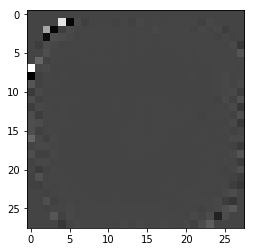

In [8]:
image   = lsp.reshape((size_row, size_col))
plt.imshow(image, cmap='Greys')

# define the ^{f} classifier

In [9]:
def fhat(label):
    for i in range (label.size):
        if label[i]>=0:
            label[i]=1
        else:
            label[i]=-1
    return label
fhat_result=fhat(result)

# define the TP,FP,FN,TN

In [10]:
TF_classifier=np.zeros(fhat_result.size)
TP=np.zeros(size_row* size_col)
FP=np.zeros(size_row* size_col)
FN=np.zeros(size_row* size_col)
TN=np.zeros(size_row* size_col)
TP_num,FP_num,FN_num,TN_num=0,0,0,0

for i in range(fhat_result.size):
    if fhat_result[i] == 1 and list_label_test.T[i]==0:
        TF_classifier[i]=0 #it means TP
        TP+=list_image_test.T[i]
        TP_num+=1
    elif fhat_result[i]==1 and list_label_test.T[i]!=0:
        TF_classifier[i]=1 #it means FP
        FP+=list_image_test.T[i]
        FP_num+=1
    elif fhat_result[i]==-1 and list_label_test.T[i]==0:
        TF_classifier[i]=1 #it means FN
        FN+=list_image_test.T[i]
        FN_num+=1
    elif fhat_result[i]==-1 and list_label_test.T[i]!=0:
        TF_classifier[i]=1 #it means TN 
        TN+=list_image_test.T[i]
        TN_num+=1


# plot the evaluation value table(TP,FP,TN,FN)

In [11]:

df=pd.DataFrame({'P':[TP_num,FP_num,TP_num+FP_num],
                 'N':[TN_num,FN_num,TN_num+FN_num],
                 'TOTAL':[TP_num+TN_num,FP_num+FN_num,TP_num+FP_num+FN_num+TN_num]
                },index=['T','F','ALL'])
df

,P,N,TOTAL
T,917,8959,9876
F,61,63,124
ALL,978,9022,10000


# plot the average image (28*28) of TP

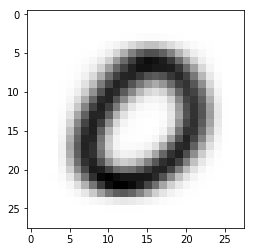

In [12]:
TP=TP/TP_num
TP   = TP.reshape(size_row, size_col)
plt.imshow(TP, cmap='Greys')

# plot the average image (28*28) of FP

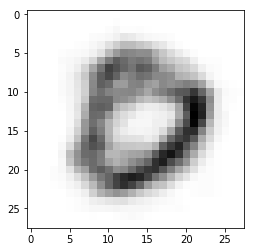

In [13]:
FP=FP/FP_num
FP   = FP.reshape(size_row, size_col)
plt.imshow(FP, cmap='Greys')

# plot the average image (28*28) of FN

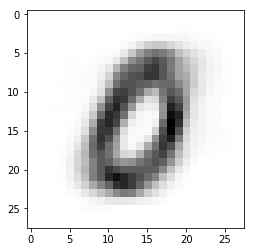

In [14]:
FN=FN/FN_num
FN   = FN.reshape(size_row, size_col)
plt.imshow(FN, cmap='Greys')

# plot the average image (28*28) of TN

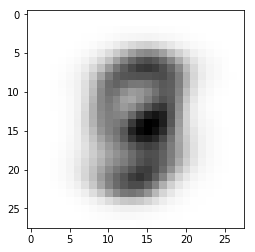

In [15]:
TN=TN/TN_num
TN   = TN.reshape(size_row, size_col)
plt.imshow(TN, cmap='Greys')
